In [1]:
addprocs(4);  # change this to number of cores

using JLD
@everywhere using Distributions
@everywhere using QR
@everywhere using Gurobi
@everywhere using CDLasso

The helper file contains the following functions

- `estimCoeff`
- `estimCoeffOracle`
- `generate_data`
- `estimSparsityFunctionOracle`


In [2]:
@everywhere include("sims/helper_funcs.jl")

# Plot results

In [4]:
using PyPlot

Gaussian noise, equicorrelation design, oracle procedure

In [7]:
numTests = 500
res = load("sims/oracle_noise_1_cor_1_var_1.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end

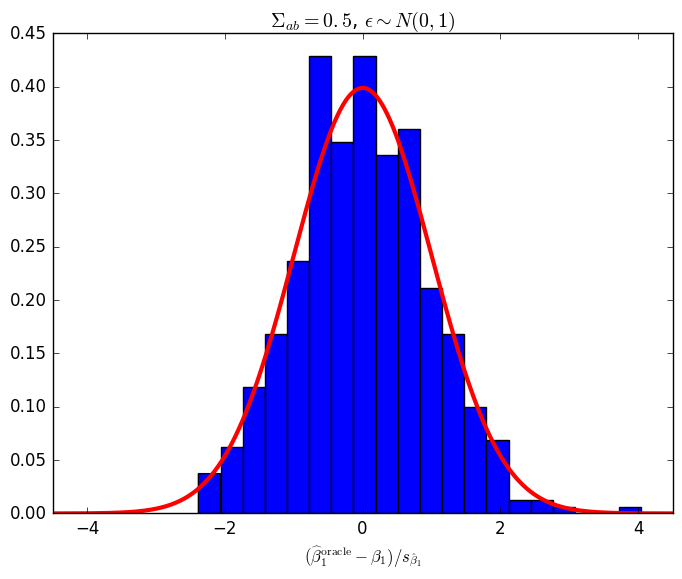

PyObject <matplotlib.text.Text object at 0x7fc777e7b650>

In [20]:
plt[:hist](ores, min(20,numTests), normed=true)

ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.5$, $\epsilon\sim N(0,1)$")
xlabel(L"$(\widehat\beta_1^{\rm oracle} - \beta_1)/s_{\hat \beta_1}$")

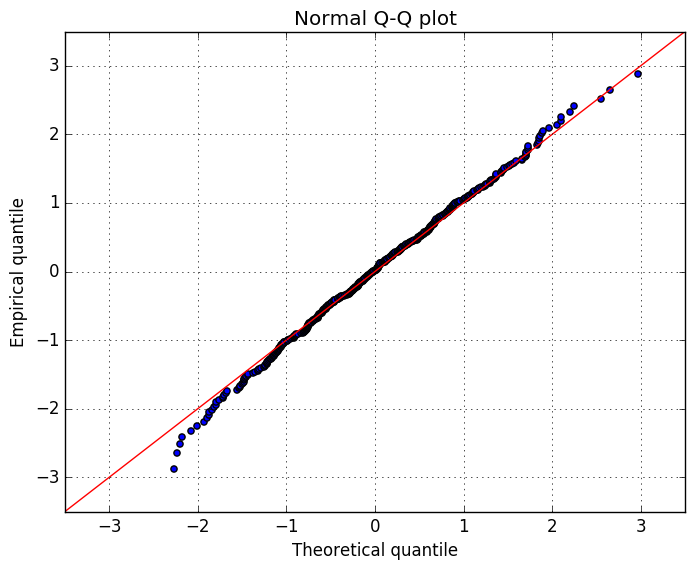

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in qqbuild at /home/mkolar/.julia/v0.4/Distributions/src/qq.jl:16
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/mkolar/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/mkolar/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[21], in expression starting on line 1


In [21]:
qq = qqbuild(ores, Normal())
scatter(qq.qx, qq.qy)
ax = gca()
ax[:set_ylim]([-3.5, 3.5])
ax[:set_xlim]([-3.5, 3.5])
xx=-3.5:0.01:3.5
plot(xx,xx, color="red")
title("Normal Q-Q plot")
ylabel("Empirical quantile")
xlabel("Theoretical quantile")
grid("on")

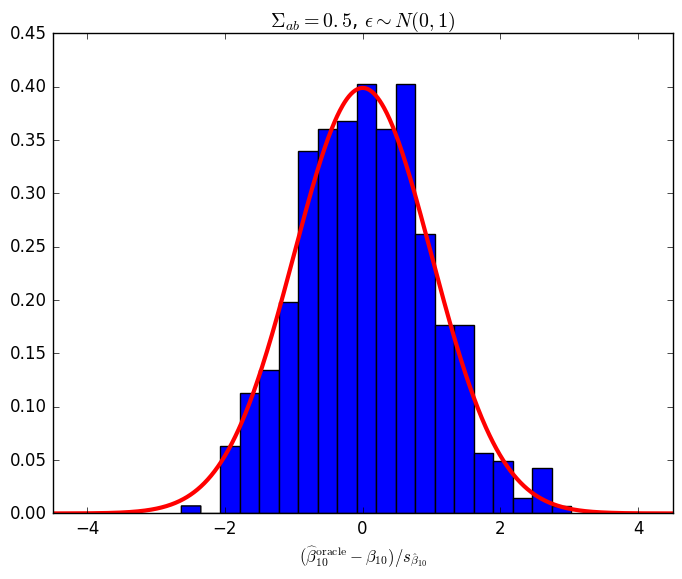

PyObject <matplotlib.text.Text object at 0x7fc776178150>

In [22]:
res = load("sims/oracle_noise_1_cor_1_var_10.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt[:hist](ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.5$, $\epsilon\sim N(0,1)$")
xlabel(L"$(\widehat\beta_{10}^{\rm oracle} - \beta_{10})/s_{\hat \beta_{10}}$")

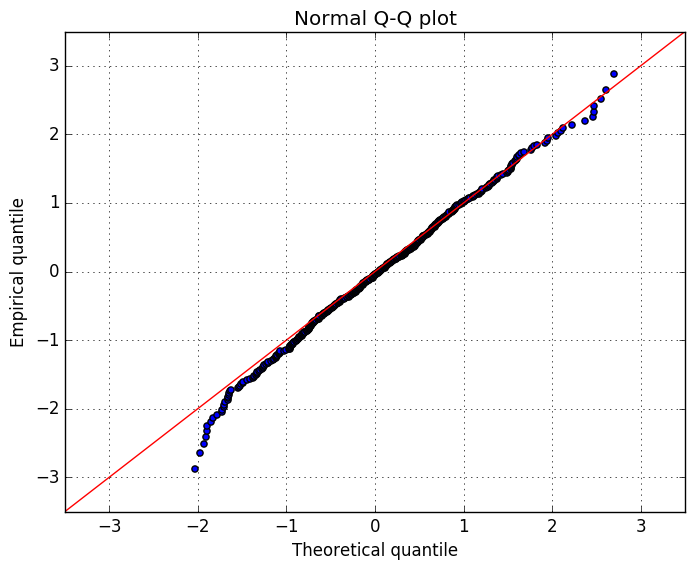

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in qqbuild at /home/mkolar/.julia/v0.4/Distributions/src/qq.jl:16
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/mkolar/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/mkolar/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[23], in expression starting on line 1


In [23]:
qq = qqbuild(ores, Normal())
scatter(qq.qx, qq.qy)
ax = gca()
ax[:set_ylim]([-3.5, 3.5])
ax[:set_xlim]([-3.5, 3.5])
xx=-3.5:0.01:3.5
plot(xx,xx, color="red")
title("Normal Q-Q plot")
ylabel("Empirical quantile")
xlabel("Theoretical quantile")
grid("on")

TDist(1) noise, equicorrelation design, oracle procedure

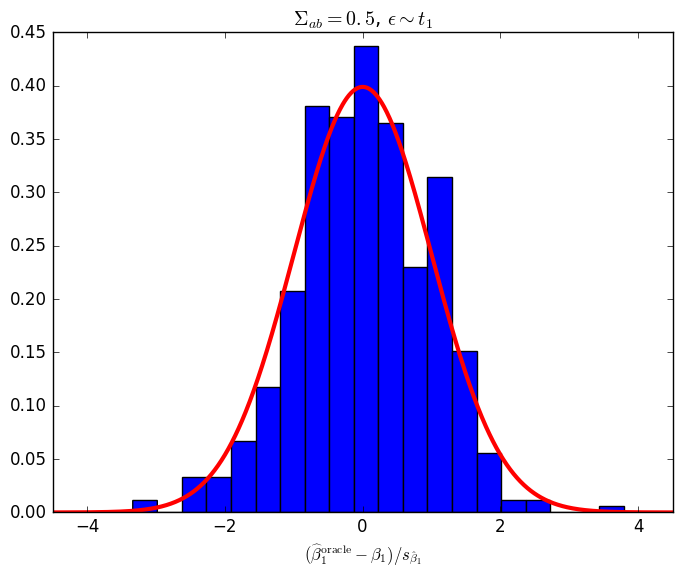

PyObject <matplotlib.text.Text object at 0x7fc775f6c490>

In [26]:
res = load("sims/oracle_noise_2_cor_1_var_1.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt[:hist](ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.5$, $\epsilon\sim t_1$")
xlabel(L"$(\widehat\beta_1^{\rm oracle} - \beta_1)/s_{\hat \beta_1}$")

In [ ]:
qq = qqbuild(ores, Normal())
scatter(qq.qx, qq.qy)
ax = gca()
ax[:set_ylim]([-3.5, 3.5])
ax[:set_xlim]([-3.5, 3.5])
xx=-3.5:0.01:3.5
plot(xx,xx, color="red")
title("Normal Q-Q plot")
ylabel("Empirical quantile")
xlabel("Theoretical quantile")
grid("on")

In [ ]:
res = load("sims/oracle_noise_2_cor_1_var_10.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.5$, $\epsilon\sim t_1$")
xlabel(L"$(\widehat\beta_{10}^{\rm oracle} - \beta_{10})/s_{\hat \beta_{10}}$")

In [ ]:
qq = qqbuild(ores, Normal())
scatter(qq.qx, qq.qy)
ax = gca()
ax[:set_ylim]([-3.5, 3.5])
ax[:set_xlim]([-3.5, 3.5])
xx=-3.5:0.01:3.5
plot(xx,xx, color="red")
title("Normal Q-Q plot")
ylabel("Empirical quantile")
xlabel("Theoretical quantile")
grid("on")

Gaussian noise, toeplitz design, oracle procedure

In [ ]:
res = load("sims/oracle_noise_1_cor_3_var_1.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.1^{|a-b|}$, $\epsilon\sim N(0,1)$")
xlabel(L"$(\widehat\beta_{1}^{\rm oracle} - \beta_{1})/s_{\hat \beta_1}$")

In [ ]:
qq = qqbuild(ores, Normal())
scatter(qq.qx, qq.qy)
ax = gca()
ax[:set_ylim]([-3.5, 3.5])
ax[:set_xlim]([-3.5, 3.5])
xx=-3.5:0.01:3.5
plot(xx,xx, color="red")
title("Normal Q-Q plot")
ylabel("Empirical quantile")
xlabel("Theoretical quantile")
grid("on")

In [ ]:
res = load("sims/oracle_noise_1_cor_3_var_10.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.1^{|a-b|}$, $\epsilon\sim N(0,1)$")
xlabel(L"$(\widehat\beta_{10}^{\rm oracle} - \beta_{10})/s_{\hat \beta_{10}}$")

In [ ]:
qq = qqbuild(ores, Normal())
scatter(qq.qx, qq.qy)
ax = gca()
ax[:set_ylim]([-3.5, 3.5])
ax[:set_xlim]([-3.5, 3.5])
xx=-3.5:0.01:3.5
plot(xx,xx, color="red")
title("Normal Q-Q plot")
ylabel("Empirical quantile")
xlabel("Theoretical quantile")
grid("on")

TDist(1), toeplitz design, oracle procedure

In [ ]:
res = load("sims/oracle_noise_2_cor_3_var_1.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.1^{|a-b|}$, $\epsilon\sim t_1$")
xlabel(L"$(\widehat\beta_{1}^{\rm oracle} - \beta_{1})/s_{\hat \beta_1}$")

In [ ]:
qq = qqbuild(ores, Normal())
scatter(qq.qx, qq.qy)
ax = gca()
ax[:set_ylim]([-3.5, 3.5])
ax[:set_xlim]([-3.5, 3.5])
xx=-3.5:0.01:3.5
plot(xx,xx, color="red")
title("Normal Q-Q plot")
ylabel("Empirical quantile")
xlabel("Theoretical quantile")
grid("on")

In [ ]:
res = load("sims/oracle_noise_2_cor_3_var_10.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.1^{|a-b|}$, $\epsilon\sim t_1$")
xlabel(L"$(\widehat\beta_{10}^{\rm oracle} - \beta_{10})/s_{\hat \beta_{10}}$")

In [ ]:
qq = qqbuild(ores, Normal())
scatter(qq.qx, qq.qy)
ax = gca()
ax[:set_ylim]([-3.5, 3.5])
ax[:set_xlim]([-3.5, 3.5])
xx=-3.5:0.01:3.5
plot(xx,xx, color="red")
title("Normal Q-Q plot")
ylabel("Empirical quantile")
xlabel("Theoretical quantile")
grid("on")

# Our estimator

In [25]:
numTests = 500
res = load("sims/noise_1_cor_1_var_1.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.5$, $\epsilon\sim N(0,1)$")
xlabel(L"$(\widehat\beta_1 - \beta_1)/s_{\hat \beta_1}$")

LoadError: LoadError: type PyObject has no field hist
while loading In[25], in expression starting on line 7

In [ ]:
numTests = 500
res = load("sims/noise_1_cor_1_var_10.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.5$, $\epsilon\sim N(0,1)$")
xlabel(L"$(\widehat\beta_{10} - \beta_{10})/s_{\hat \beta_{10}}$")

In [ ]:
numTests = 500
res = load("sims/noise_1_cor_1_var_20.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.5$, $\epsilon\sim N(0,1)$")
xlabel(L"$(\widehat\beta_{20} - \beta_{20})/s_{\hat \beta_{20}}$")

In [ ]:
numTests = 500
res = load("sims/noise_2_cor_1_var_1.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.5$, $\epsilon\sim t_1$")
xlabel(L"$(\widehat\beta_1 - \beta_1)/s_{\hat \beta_1}$")

In [ ]:
numTests = 500
res = load("sims/noise_2_cor_1_var_10.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.5$, $\epsilon\sim t_1$")
xlabel(L"$(\widehat\beta_{10} - \beta_{10})/s_{\hat \beta_{10}}$")

In [ ]:
numTests = 500
res = load("sims/noise_2_cor_1_var_20.jld", "res")
ores = zeros(numTests)
for i=1:numTests
  ores[i] = res[i][4]
end
plt.hist(ores, min(20,numTests), normed=true)
ax = gca()
ax[:set_xlim]([-4.5, 4.5])
d = Normal()
xarr = -4.5:0.01:4.5
plot(xarr, pdf(d, xarr), color="red", linewidth=3)
title(L"$\Sigma_{ab} = 0.5$, $\epsilon\sim t_1$")
xlabel(L"$(\widehat\beta_{20} - \beta_{20})/s_{\hat \beta_{20}}$")

## Create figures for the paper

Equicorrelation design

# Try mixture model

In [ ]:
d = MixtureModel(Normal, [(0., 1.), (3., 0.4), (-3.0, 0.4)], [0.6, 0.2, 0.2])
xx = -6.:0.1:6.
plot(xx, pdf(d, xx))

In [ ]:
using Cubature

In [ ]:
xx = -7.:0.01:7.
cdfMixture = [hquadrature(x -> pdf(d, x), -7., y)[1] for y in xx];
plot(xx, cdfMixture, linewidth=2)
plot(xx, cdf(Normal(), xx), linewidth=1)